In [3]:
import numpy as np
import pandas as pd
import scipy as scp
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
#from statsmodels.graphics.gofplots import qqplot

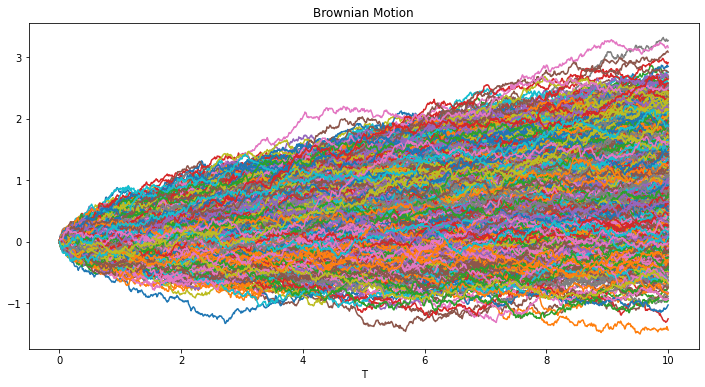

In [21]:
np.random.seed(seed =5)
paths = 4000
steps = 1000

mu = 0.1
sigma = 0.2
T = 10
dt = T/steps
T_vec = np.linspace(0,T ,steps)

X0 = np.zeros((paths , 1))
increments = ss.norm.rvs(loc = mu*dt , scale = np.sqrt(dt)*sigma , size = (paths,steps-1))
X = np.concatenate((X0 , increments) , axis = 1).cumsum(1)
plt.figure(figsize=(12,6))
plt.plot(T_vec,X.T)
plt.title("Brownian Motion")
plt.xlabel("T")
plt.show()

In [24]:
X_end = X[:,-1]
print("Expected Value of X at time T = {:.4f}".format(X_end.mean()))
print("Std. Deviation of X at time T = {:.4f}".format(X_end.std(ddof = 1))) #unbiased estimator ,dof =1

Expected Value of X at time T = 1.0094
Std. Deviation of X at time T = 0.6246


Confidence Interval

In [27]:
#t_test for mean
print("The expectation of the mean is: {:.6f}".format(X_end.mean()))
print("The confidence interval is: ", ss.t.interval(0.95, paths - 1, loc=X_end.mean(), scale=ss.sem(X_end)))

The expectation of the mean is: 1.009356
The confidence interval is:  (0.9899955648066453, 1.0287173764042643)


In [28]:
#chi square test for variance
s2 = X_end.var(ddof=1)  # unbiased sample variance
AA = s2 * (paths - 1)
print("The estimated Standard Deviation is: {:.6f}".format(X_end.std(ddof=1)))
print(
    "The confidence interval is: ",
    np.sqrt(AA / ss.chi2.ppf(0.975, df=paths - 1)),
    np.sqrt(AA / ss.chi2.ppf(0.025, df=paths - 1)),
)

The estimated Standard Deviation is: 0.624563
The confidence interval is:  0.6111710479348424 0.6385588613044257


In [30]:
#MLE estimator
param = ss.norm.fit(X_end)
print(param)
print("MLE estimator of variance" , np.std(X_end , ddof = 0))

(1.0093564706054547, 0.6244847210511233)
MLE estimator of variance 0.6244847210511233


Hypothesis Testing

In [31]:
ss.shapiro(X_end)
#at 95% CI we cannot reject null hypothesis

ShapiroResult(statistic=0.9996930956840515, pvalue=0.8413407802581787)

In [32]:
ss.jarque_bera(X_end)

SignificanceResult(statistic=1.528239320655538, pvalue=0.46574376326392886)

In [33]:
ss.kstest(X_end, lambda x: ss.norm.cdf(x, loc=1, scale=.2*np.sqrt(10)))

KstestResult(statistic=0.01470756277362198, pvalue=0.34904440543383064, statistic_location=0.5648327744131193, statistic_sign=-1)

Geometric Brownian Motion

In [37]:
np.random.seed(seed=5)
mu = 0.1
sig = 0.2
T = 1
N = 100000
S0 = 1

W = ss.norm.rvs(loc=(mu - 0.5 * sig**2) * T, scale=np.sqrt(T) * sig, size=N)
S_T = S0 * np.exp(W)

In [38]:
param_LN = ss.lognorm.fit(S_T)
print("Fitted parameters: ", param_LN)
print("Shape: ", sig * np.sqrt(T))
print("Scale: ", np.exp((mu - 0.5 * sig**2) * T))

Fitted parameters:  (0.20107958749470897, 0.0033527210937904094, 1.0806836785288667)
Shape:  0.2
Scale:  1.0832870676749586


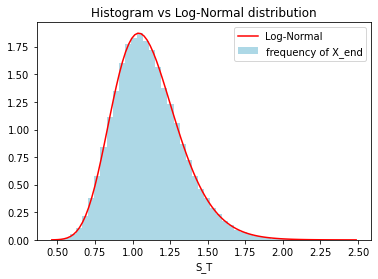

In [39]:
x = np.linspace(S_T.min(), S_T.max(), 100)
pdf_LN_fitted = ss.lognorm.pdf(x, *param_LN)

plt.plot(x, pdf_LN_fitted, color="r", label="Log-Normal")
plt.hist(S_T, density=True, bins=50, facecolor="LightBlue", label="frequency of X_end")
plt.legend()
plt.title("Histogram vs Log-Normal distribution")
plt.xlabel("S_T")
plt.show()

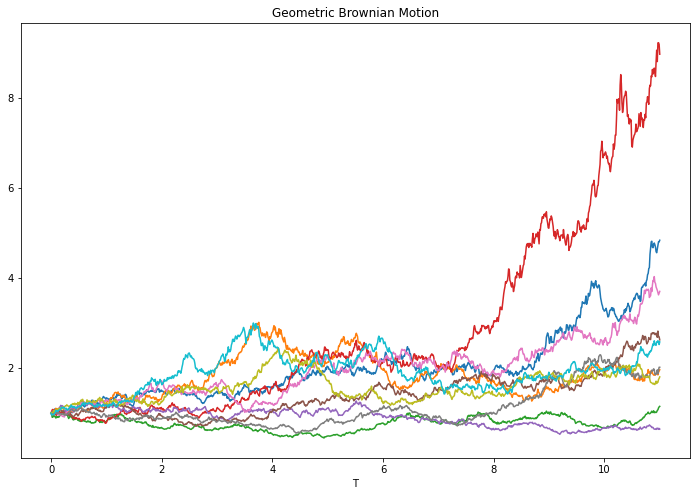

In [44]:
np.random.seed(seed=5)
paths = 10 # number of paths
steps = 1000  # number of time steps
T = 11
T_vec, dt = np.linspace(0, T, steps, retstep=True)

X0 = np.zeros((paths, 1))  # each path starts at zero
W = ss.norm.rvs((mu - 0.5 * sig**2) * dt, np.sqrt(dt) * sig, (paths, steps - 1))
X = np.concatenate((X0, W), axis=1).cumsum(1)

S_T = np.exp(X)
plt.figure(figsize = (12,8))
plt.plot(T_vec, S_T.T)
plt.title("Geometric Brownian Motion")
plt.xlabel("T")
plt.show()